# Demonstration of preprocessing tools implemented in the openhytest

Copyright 2019 - Openhytest Developer


This jupiter notebook is saved in a subfolder such that we set the right path without creating any error messages. We will append the folder above using the sys library.

In addition we load the pandas library, which is used for data management, analysis and visualisation in the openhytest package. The matplotlib.pyplot is loaded for first visualisation of the raw data in this notebook. 


In [1]:
import sys
sys.path.append("..")
import openhytest as ht

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data

The pandas package allow to load the raw data from many different input files (i.e. csv, excel, json, html, hdf, sql, gbq, stata more in the documentation of https://pandas.pydata.org/ ). A few things are important to know, prior to the use of openhytest. The data are loaded using the command read_csv with space separation. This creates a DataFrame  with the name data. A naming is not only recommended for the usage, it allows also direct labeling in figures and easy data accessability. It is also directly used by the openhytest package and for some functions compulsory.
The type of data format is recommended, such that float number are desired explicit.

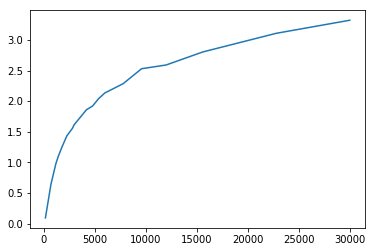

In [3]:
name = ["t","s"]
dtypes = {'t': 'float', 's': 'float'}
data = pd.read_csv('../data/ths_ds1.txt', sep=" ", header = None, names=name, dtype=dtypes)
plt.plot(data.t,data.s)

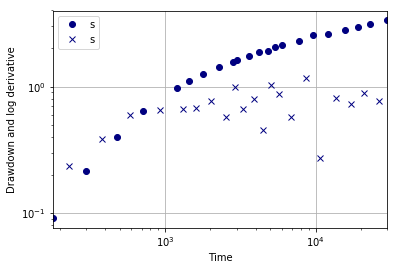

In [4]:
ht.ldiff_plot(data)

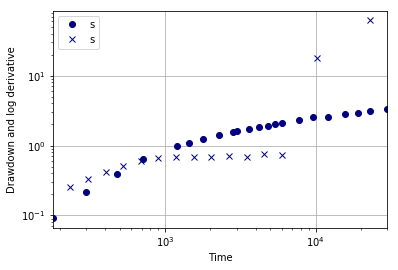

In [5]:
ht.ldiffs_plot(data)

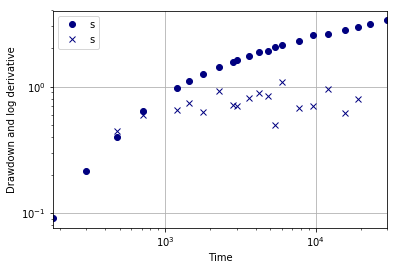

In [6]:
ht.ldiffb_plot(data)

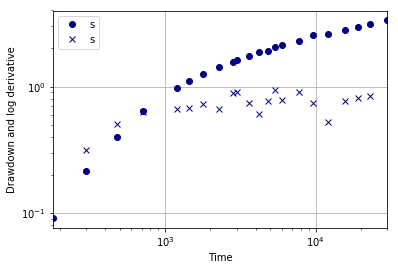

In [7]:
ht.ldiffh_plot(data)

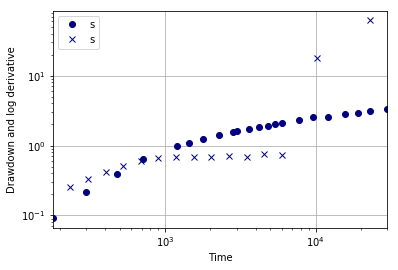

In [8]:
ht.diagnostic(data)

In [9]:
data['s'][2] = -.1
data['s'][19] = np.inf
print(data)

          t        s
0     180.0  0.09144
1     300.0  0.21336
2     480.0 -0.10000
3     720.0  0.64008
4    1200.0  0.97536
5    1440.0  1.09728
6    1800.0  1.24968
7    2280.0  1.43256
8    2820.0  1.55448
9    3000.0  1.61544
10   3600.0  1.73736
11   4200.0  1.85928
12   4800.0  1.92024
13   5400.0  2.04216
14   6000.0  2.13360
15   7800.0  2.28600
16   9600.0  2.52984
17  12000.0  2.59080
18  15600.0  2.80416
19  19200.0      inf
20  22800.0  3.10896
21  30000.0  3.32232


In [10]:
data2 = ht.hyclean(data)
print(data2)

          t        s
0     180.0  0.09144
1     300.0  0.21336
3     720.0  0.64008
4    1200.0  0.97536
5    1440.0  1.09728
6    1800.0  1.24968
7    2280.0  1.43256
8    2820.0  1.55448
9    3000.0  1.61544
10   3600.0  1.73736
11   4200.0  1.85928
12   4800.0  1.92024
13   5400.0  2.04216
14   6000.0  2.13360
15   7800.0  2.28600
16   9600.0  2.52984
17  12000.0  2.59080
18  15600.0  2.80416
20  22800.0  3.10896
21  30000.0  3.32232


In [11]:
df = data2.head(0)
df = list(df)   

In [12]:
i=1
p=3

In [13]:
data2[df[i]+'_filt'] = data2.iloc[:,i].rolling(window=p,center=True).mean()

In [14]:
print(data2)

          t        s   s_filt
0     180.0  0.09144      NaN
1     300.0  0.21336  0.31496
3     720.0  0.64008  0.60960
4    1200.0  0.97536  0.90424
5    1440.0  1.09728  1.10744
6    1800.0  1.24968  1.25984
7    2280.0  1.43256  1.41224
8    2820.0  1.55448  1.53416
9    3000.0  1.61544  1.63576
10   3600.0  1.73736  1.73736
11   4200.0  1.85928  1.83896
12   4800.0  1.92024  1.94056
13   5400.0  2.04216  2.03200
14   6000.0  2.13360  2.15392
15   7800.0  2.28600  2.31648
16   9600.0  2.52984  2.46888
17  12000.0  2.59080  2.64160
18  15600.0  2.80416  2.83464
20  22800.0  3.10896  3.07848
21  30000.0  3.32232      NaN


In [18]:
xs, ys = ht.hysampling(data.t, data.s, 20)